In [35]:
import torch
from torch.utils.data import DataLoader
from torch.optim import Adadelta

In [53]:
from willitsurf.models.conv import ConvNet
from willitsurf.dataset import SurfImageDataset
from willitsurf.dataset import train_val_test_datset_split
from willitsurf.dataset import BalancedClassDataloader
from willitsurf.models.conv import train, validate, test

In [37]:
dataset = SurfImageDataset('./assets/data/labels/annotations.tsv', './assets/data/raw')

In [38]:
len(dataset)

758

In [39]:
train_dataset, val_dataset, test_dataset = train_val_test_datset_split(dataset)

In [45]:
train_dataloader = BalancedClassDataloader(train_dataset, batch_size=32)

In [41]:
val_dataloader = DataLoader(val_dataset, batch_size=32, shuffle=True)
test_dataloader = DataLoader(test_dataset, batch_size=32, shuffle=True)

In [42]:
model = ConvNet()
model.to('mps')

ConvNet(
  (conv1): Conv2d(3, 16, kernel_size=(10, 10), stride=(4, 4))
  (conv2): Conv2d(16, 32, kernel_size=(3, 3), stride=(1, 1))
  (dropout1): Dropout2d(p=0.1, inplace=False)
  (dropout2): Dropout(p=0.25, inplace=False)
  (fullyconnected1): Linear(in_features=327488, out_features=64, bias=True)
  (fullyconnected2): Linear(in_features=64, out_features=2, bias=True)
  (maxpool1): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (flatten1): Flatten(start_dim=1, end_dim=-1)
  (logsoftmax1): LogSoftmax(dim=1)
)

In [49]:
optimizer = Adadelta(model.parameters(), lr=0.001)

In [399]:
for epoch in range(100):
    train(model, 'mps', train_dataloader, optimizer, epoch)
    if epoch % 10 == 0:
        validate(model, 'mps', val_dataloader)

epoch: 0, 0, 568, 0.0, 0.46385836601257324
epoch: 0, 320, 568, 55.55555555555556, 0.3801025450229645
Val dataset: Overall loss: 0.44191172248438787 Overall accuracy: 66/76 (86.84210526315789)


In [52]:
torch.save(model.state_dict(), './assets/weights/conv_model_200_epochs.pth')

In [322]:
test(model, 'mps', test_dataloader)

Test dataset: Overall loss: 0.419693202303167 Overall accuracy: 97/114 (85.08771929824562)


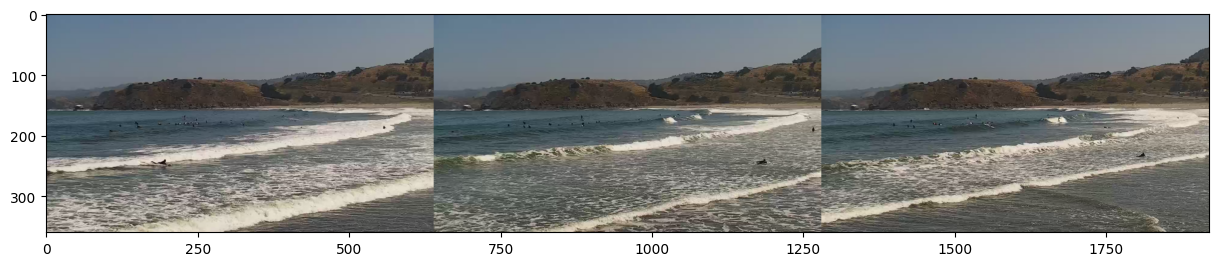

In [396]:
import matplotlib.pyplot as plt
test_samples = enumerate(test_dataloader)
b_i, (sample_data, sample_targets) = next(test_samples)
fig, ax = plt.subplots(figsize=(15, 5))
plt.imshow(
    sample_data[0].transpose(0, 2).transpose(0, 1),
)
#plt.show()

In [397]:
sample_data = sample_data.to('mps')
sample_targets = sample_targets.to('mps')

In [398]:
print(
    f'Model prediction is : {model(sample_data).data.max(1)[1][0]}'
)
print(
    f'Ground truth is : {sample_targets[0]}'
)

Model prediction is : 1
Ground truth is : 1
